# Demo for training

In [1]:
%matplotlib notebook
from utils import Args, get_encoder, ImageDescriptor, plot_loss
from build_vocab import Vocabulary
from random import randint
import matplotlib.pyplot as plt

## 1. Instantiate argument

### This step is necessary for jupyter notebook. If you run in the terminal, just use parser argument.

Here, take `ResNet101` with attention layers for example, and the following are arguments/parameters fitting into the model.

In [2]:
args = Args(encoder='resnet', encoder_ver=101, mode='train', attention=True, num_epochs=15, plot=True, validate_when_training=True, model_dir='../models')

for key, val in vars(args).items():
    print(f'{key}: {val}')

log_step: 10
save_step: 1000
embed_size: 256
hidden_size: 512
crop_size: 224
num_layers: 1
num_epochs: 15
batch_size: 128
num_workers: 2
learning_rate: 0.001
encoder: resnet
encoder_ver: 101
mode: train
attention: True
caption: False
model_dir: ../models
checkpoint: None
vocab_path: ../data/vocab.pkl
image_path: ../png/example.png
plot: True
image_dir: ../data/resized2014
validate_when_training: True
caption_path: ../data/annotations/captions_train2014.json


## 2. Instantiate the model

### Select which CNN model (`ResNet` or `VGG`) for features extracting. 
Here take `ResNet101` for example as mentioned in previous part.

In [3]:
encoder = get_encoder(args)
print(encoder)

ResNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_

### Create the model `ImageDescriptor` for image captioning

In [4]:
model = ImageDescriptor(args, encoder=get_encoder(args))
print(model)

loading annotations into memory...
Done (t=0.66s)
creating index...
index created!
loading annotations into memory...
Done (t=0.45s)
creating index...
index created!
Load from ../models/resnet101-epoch-15.ckpt.
Net((ResNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1

## 3. Train the model `ImageDescriptor`
According to `args`, we train the model for 15 epochs.

<IPython.core.display.Javascript object>


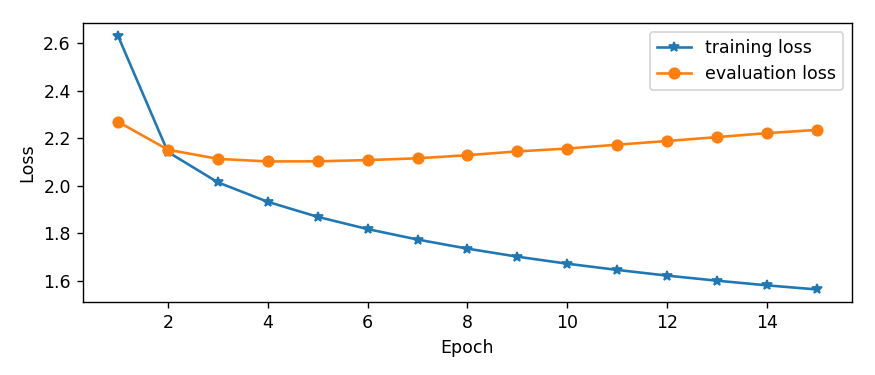

Start/Continue training from epoch 15
Finish training for 15 epochs


In [5]:
fig, axes = plt.subplots(ncols=1, figsize=(7,3))
model.train(plot_loss=lambda x: plot_loss(x, fig=fig, axes=axes))